Milestone 2:Data Collection &Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats


In [2]:
from google.colab import files
uploaded = files.upload()

Saving indian_liver_patient.csv to indian_liver_patient (1).csv


In [5]:
data = pd.read_csv('/content/indian_liver_patient.csv')

In [6]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [8]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
data=data.replace(['Male'],[0])
data=data.replace(['Female'],[1])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [11]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [12]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [13]:
data[data['Dataset']==1]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,0,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,0,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1


In [ ]:
#mode inputation
#data['Albumin_and_Globulin_Ratio'] = data.fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])

In [14]:
data_1 = data.dropna()

In [15]:
#checking for the missing data after cleaning data
#data['Albumin_and_Globulin_Ratio'] = data.fillna(data['Albumin_and_Globulin_Ratio'].moode()[0])
data_1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder() 

In [17]:
data['Gender']=lc.fit_transform(data['Gender'])

Milestone 3: Exploratory Data Analysis

In [18]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.243568,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


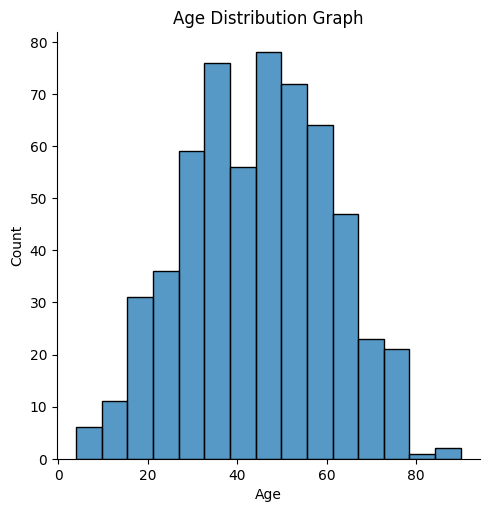

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.displot(data['Age'])
plt.title('Age Distribution Graph')
plt.show()

Liver disease patients: 414
NOn-liver disease patients: 165


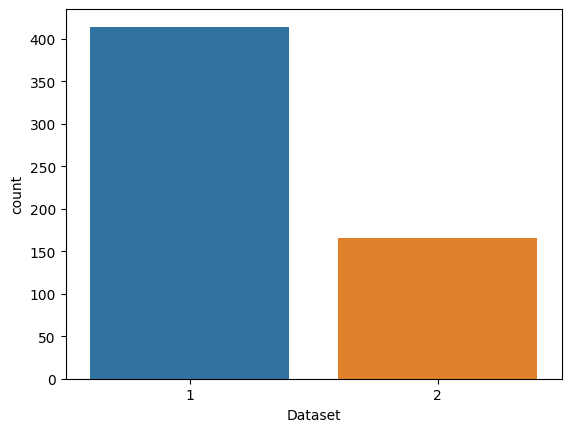

In [ ]:
sns.countplot(data=data_1, x='Dataset')
LD,NLD=data_1['Dataset'].value_counts()
print("Liver disease patients:", LD)
print("NOn-liver disease patients:", NLD)

No of Male: 439
No of Female: 140


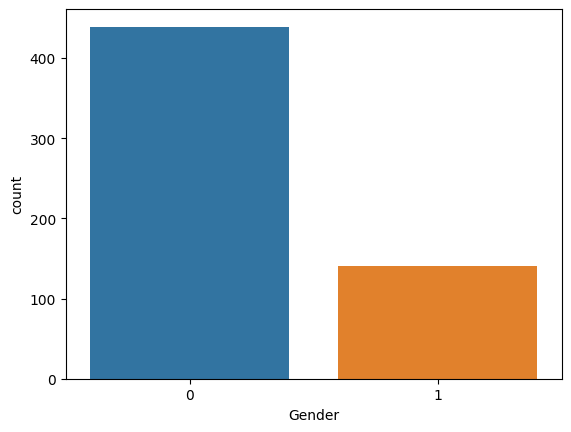

In [32]:
sns.countplot(data=data_1, x = 'Gender', label = 'Count')
m,f=data_1['Gender'].value_counts()
print("No of Male:",m)
print("No of Female:",f)

Text(0.5, 0, 'Age')

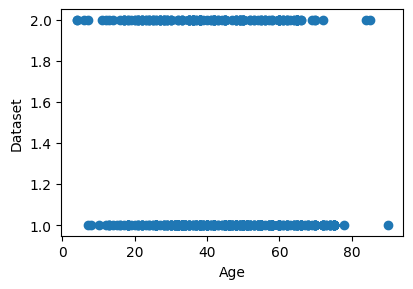

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.scatter(data['Age'], data['Dataset'])
plt.ylabel('Dataset')
plt.xlabel('Age')

Text(0.5, 0, 'Gender')

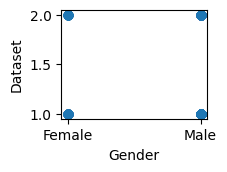

In [ ]:
plt.subplot(3,3,2)
plt.scatter(data_1['Gender'], data_1['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Gender')

Text(0.5, 0, 'Total_Bilirubin')

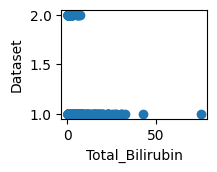

In [ ]:
plt.subplot(3,3,3)
plt.scatter(data_1['Total_Bilirubin'], data_1['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Total_Bilirubin')

In [ ]:
plt.subplot(3,3,4)
plt.scatter(data_1['Direct_Bilirubin'], data_1['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Direct_Bilirubin')

In [ ]:
plt.subplot(3,3,5)
plt.scatter(data_1['Alkaline_Phosphotase'], data_1['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Alkaline_Phosphotase')

In [ ]:
plt.subplot(3,3,6)
plt.scatter(data_1['Alamine_Aminotransferase'], data_1['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Alamine_Aminotransferase')

In [ ]:
plt.subplot(3,3,7)
plt.scatter(data_1['Aspartate_Aminotransferase'], data_1['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Aspartate_Aminotransferase')

In [ ]:
plt.subplot(3,3,8)
plt.scatter(data_1['Total_Protiens'], data_1['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Total_Protiens')

Text(0.5, 0, 'Albumin_and_Globulin_Ratio')

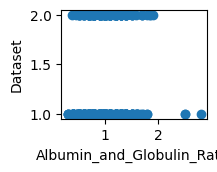

In [ ]:
plt.subplot(3,3,9)
plt.scatter(data_1['Albumin_and_Globulin_Ratio'], data_1['Dataset'],)
plt.ylabel('Dataset')
plt.xlabel('Albumin_and_Globulin_Ratio')

<Axes: >

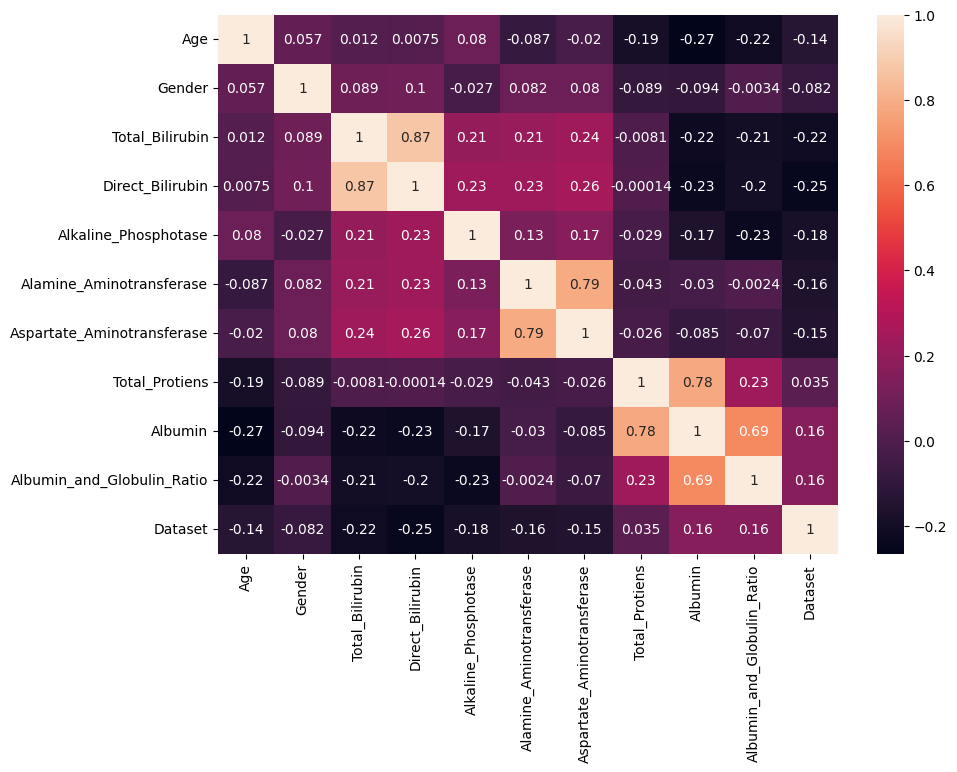

In [ ]:
plt.figure(figsize=(10,7))

sns.heatmap(data.corr(),annot=True)

In [20]:
from sklearn.preprocessing import scale
x=data
X_scaled= pd.DataFrame(scale(x), columns=x.columns)

In [21]:
X_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,1.252098,1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147390,-0.633595
1,1.066637,-0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.648461,-0.633595
2,1.066637,-0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.178707,-0.633595
3,0.819356,-0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165780,-0.633595
4,1.684839,-0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.713237,-0.633595


In [ ]:
data_1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [23]:
x = data_1.iloc[:,0:-1]
y = data_1.iloc[:,-1]


In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2) 

In [25]:
xtrain

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
35,30,0,1.3,0.4,482,102,80,6.9,3.3,0.90
339,75,0,1.4,0.4,215,50,30,5.9,2.6,0.70
471,49,1,0.6,0.1,185,17,26,6.6,2.9,0.70
371,33,0,0.8,0.2,135,30,29,7.2,4.4,1.50
44,85,1,1.0,0.3,208,17,15,7.0,3.6,1.00
...,...,...,...,...,...,...,...,...,...,...
149,60,0,0.8,0.2,286,21,27,7.1,4.0,1.20
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
559,26,0,42.8,19.7,390,75,138,7.5,2.6,0.50
114,50,0,5.8,3.0,661,181,285,5.7,2.3,0.67


In [26]:
ytrain

35     1
339    1
471    2
371    2
44     2
      ..
149    1
578    2
559    1
114    2
323    2
Name: Dataset, Length: 463, dtype: int64

In [27]:
xtest

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
277,60,0,2.0,0.8,190,45,40,6.0,2.8,0.80
99,18,0,0.7,0.1,312,308,405,6.9,3.7,1.10
228,65,1,1.0,0.3,202,26,13,5.3,2.6,0.90
467,28,1,1.0,0.3,90,18,108,6.8,3.1,0.80
334,13,1,0.7,0.2,350,17,24,7.4,4.0,1.10
...,...,...,...,...,...,...,...,...,...,...
575,32,0,25.0,13.7,560,41,88,7.9,2.5,2.50
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50
36,17,1,0.7,0.2,145,18,36,7.2,3.9,1.18
537,10,1,0.8,0.1,395,25,75,7.6,3.6,0.90


In [28]:
ytest

277    1
99     1
228    2
467    2
334    1
      ..
575    1
54     1
36     2
537    1
276    2
Name: Dataset, Length: 116, dtype: int64

In [29]:
xtrain.shape

(463, 10)

In [30]:
xtest.shape

(116, 10)

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=21)

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
ytrain.value_counts()

1    319
2    144
Name: Dataset, dtype: int64

In [ ]:
xtrain.value_counts()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  Albumin  Albumin_and_Globulin_Ratio
30   Male    1.6              0.4               332                   84                        139                         5.6             2.7      0.90                          2
36   Male    0.8              0.2               158                   29                        39                          6.0             2.2      0.50                          2
39   Male    1.9              0.9               180                   42                        62                          7.4             4.3      1.38                          2
49   Male    0.6              0.1               218                   50                        53                          5.0             2.4      0.90                          2
38   Female  2.6              1.2               410                   59                        57  

Milestone 4: Model Building

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors  import KNeighborsClassifier

In [35]:
svc=SVC()
RFmodel=RandomForestClassifier()
KNNmodel=KNeighborsClassifier()

In [39]:
#support vector Machine Model
from sklearn.svm import SVC
svm=SVC()

In [37]:
svc.fit(xtrain,ytrain)

SVC()

In [48]:
SVCpred = svc.predict(xtest)

In [49]:
from sklearn.metrics import accuracy_score
SVMaccuracy=accuracy_score(SVCpred, ytest)
SVMaccuracy

0.7528735632183908

In [50]:
SVCcm=confusion_matrix(SVCpred, ytest)
SVCcm

array([[131,  43],
       [  0,   0]])

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the Decision Tree Classifier on the training data
dtclassifier.fit(xtrain, ytrain)

# Make predictions on the test data
y_pred = dtclassifier.predict(xtest)

# Calculate the accuracy of the Decision Tree Classifier
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7471264367816092


In [51]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(xtrain, ytrain)

y_pred = clf.predict(xtest)
accuracy_score(ytest, y_pred)

0.735632183908046

In [53]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(xtrain, ytrain)

y_pred = neigh.predict(xtest)
accuracy_score(ytest, y_pred)

0.6954022988505747

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(xtrain,ytrain)

LogisticRegression()

In [55]:
from sklearn.metrics import accuracy_score
y_pred = logmodel.predict(xtest)
accuracy_score(ytest, y_pred)

0.7701149425287356

In [93]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
classifier = Sequential()

In [69]:
classifier.add(Dense(units=100, activation='relu', input_dim=10))

In [70]:
classifier.add(Dense(units=100, activation='relu'))

In [71]:
classifier.add(Dense(units=50, activation='relu'))

In [72]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [73]:
classifier.compile(optimizer='adam', loss='binary_crosssentrophy', metrics=['accuracy'])

In [76]:
classifier.save('liver.h5')

In [80]:
y_pred=classifier.predict(xtest)

6/6 [==============================] - 0s 2ms/step


In [81]:
y_pred

array([[3.7101215e-06],
       [9.1074777e-05],
       [1.1691471e-08],
       [1.8391338e-08],
       [7.7270539e-05],
       [1.3089282e-08],
       [0.0000000e+00],
       [0.0000000e+00],
       [5.2477863e-15],
       [5.2396491e-36],
       [2.8223791e-08],
       [1.6393769e-05],
       [2.1015621e-05],
       [2.5750938e-05],
       [2.9608957e-06],
       [1.1967179e-26],
       [1.9036003e-27],
       [2.1492755e-05],
       [1.0899457e-04],
       [4.5083964e-11],
       [5.0203033e-09],
       [4.4375267e-11],
       [1.8297836e-24],
       [9.8241048e-07],
       [4.3293156e-09],
       [1.6804006e-05],
       [5.1641689e-27],
       [1.6746572e-10],
       [2.8562890e-06],
       [2.2388169e-09],
       [0.0000000e+00],
       [1.1466056e-05],
       [2.2501136e-17],
       [9.9546327e-08],
       [1.9818822e-09],
       [3.8872017e-06],
       [1.2117272e-05],
       [2.0672108e-11],
       [1.1547769e-06],
       [1.9086524e-21],
       [2.9761692e-08],
       [1.585338

In [82]:
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [77]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1,-1)
  sample_value = scale(sample_value)
  return classifier.predict(sample_value)

In [78]:
sample_value=[[50,1,2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit(sample_value)>0.5:
  print('Prediction: Liver Patient')
else:
    print('Prediction: Healthy')

1/1 [==============================] - 0s 120ms/step
Prediction: Healthy


In [90]:
acc_smote= [['KNN Classifier', neigh ], ['RandomForestClassifier', clf ], ['DecisionTreeCassifier', dtclassifier],['LogisticRegression', logmodel]]
Liverpatient_pred=pd.DataFrame(acc_smote, columns=['Classification models','accuracy_score'])
Liverpatient_pred

,Classification models,accuracy_score
0,KNN Classifier,KNeighborsClassifier(n_neighbors=3)
1,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r..."
2,DecisionTreeCassifier,"DecisionTreeClassifier(max_depth=3, random_sta..."
3,LogisticRegression,LogisticRegression()


In [79]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()

In [83]:
model.fit(x,y)

ExtraTreesClassifier()

In [84]:
model.feature_importances_

array([0.11733226, 0.02548975, 0.11266562, 0.10570572, 0.11623765,
       0.11563044, 0.11948605, 0.09419195, 0.09492079, 0.09833976])

In [85]:
dd = pd.DataFrame(model.feature_importances_,index=x.columns).sort_values(0,ascending=False)
dd  

,0
Aspartate_Aminotransferase,0.119486
Age,0.117332
Alkaline_Phosphotase,0.116238
Alamine_Aminotransferase,0.115630
Total_Bilirubin,0.112666
Direct_Bilirubin,0.105706
Albumin_and_Globulin_Ratio,0.098340
Albumin,0.094921
Total_Protiens,0.094192
Gender,0.025490


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

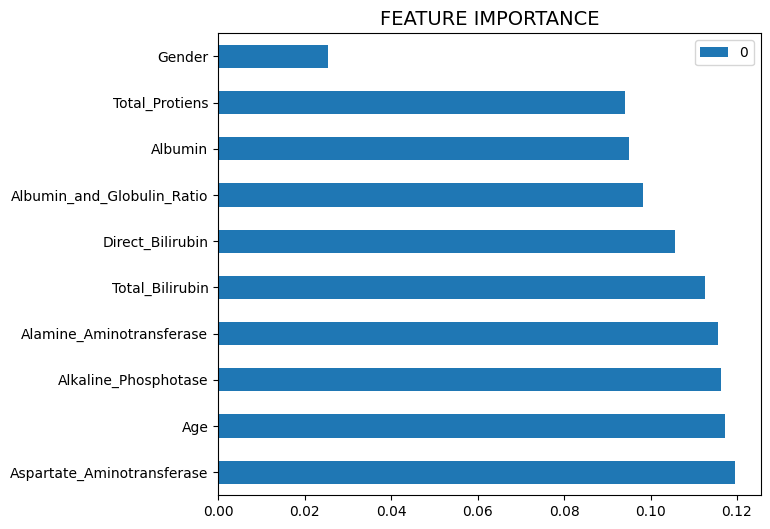

In [86]:
dd.plot(kind= 'barh', figsize=(7,6))
plt.title("FEATURE IMPORTANCE",fontsize=14)

In [95]:
import joblib
joblib.dump(model, 'ETC.pk1')

['ETC.pk1']

In [ ]:
from flask import Flask, render_template, request
import numpy as np
import pickle 

In [ ]:
app=Flask(__name__)
@app.route('/')
def  home():
  return render_template('home.html')
  @app.route('/predict')
  def index():
    return render_template("index.html")
